In [1]:
import numpy as np  
import pandas as pd 
import re  
import nltk
import matplotlib.pyplot as plt

from nltk import word_tokenize
#from nltk.probability import FreqDist
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer  
from pymystem3 import Mystem
from wordcloud import WordCloud  

from PIL import Image
#from scipy.spatial import distance # для подсчета косинусного расстояния

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#lemmatizer for russian words (from yandex)
m = Mystem()

In [3]:
# open file
path = 'C:/Users/v.kozlovskiy/Desktop/DATAS/from_aug24/_ekklesiat_wc_and_other/to_git/'
f = open(path + 'ecclesiastes_rus.txt', 'r', encoding='utf8')
text = f.read()
text

'\ufeff1:1 Слова Екклесиаста, сына Давидова, царя в Иерусалиме.\n1:2 Суета сует, сказал Екклесиаст, суета сует,- всё суета!\n1:3 Что пользы человеку от всех трудов его, которыми трудится он под солнцем?\n1:4 Род проходит, и род приходит, а земля пребывает во веки.\n1:5 Восходит солнце, и заходит солнце, и спешит к месту своему, где оно восходит.\n1:6 Идет ветер к югу, и переходит к северу, кружится, кружится на ходу своем, и возвращается ветер на круги свои.\n1:7 Все реки текут в море, но море не переполняется: к тому месту, откуда реки текут, они возвращаются, чтобы опять течь.\n1:8 Все вещи - в труде: не может человек пересказать всего; не насытится око зрением, не наполнится ухо слушанием.\n1:9 Что было, то и будет; и что делалось, то и будет делаться, и нет ничего нового под солнцем.\n1:10 Бывает нечто, о чем говорят: "смотри, вот это новое"; но это было уже в веках, бывших прежде нас.\n1:11 Нет памяти о прежнем; да и о том, что будет, не останется памяти у тех, которые будут после

f = open(path + 'ecclesiastes_rus.txt', 'r', encoding='utf8')
text = f.read()
text

In [4]:
process = text
process

'\ufeff1:1 Слова Екклесиаста, сына Давидова, царя в Иерусалиме.\n1:2 Суета сует, сказал Екклесиаст, суета сует,- всё суета!\n1:3 Что пользы человеку от всех трудов его, которыми трудится он под солнцем?\n1:4 Род проходит, и род приходит, а земля пребывает во веки.\n1:5 Восходит солнце, и заходит солнце, и спешит к месту своему, где оно восходит.\n1:6 Идет ветер к югу, и переходит к северу, кружится, кружится на ходу своем, и возвращается ветер на круги свои.\n1:7 Все реки текут в море, но море не переполняется: к тому месту, откуда реки текут, они возвращаются, чтобы опять течь.\n1:8 Все вещи - в труде: не может человек пересказать всего; не насытится око зрением, не наполнится ухо слушанием.\n1:9 Что было, то и будет; и что делалось, то и будет делаться, и нет ничего нового под солнцем.\n1:10 Бывает нечто, о чем говорят: "смотри, вот это новое"; но это было уже в веках, бывших прежде нас.\n1:11 Нет памяти о прежнем; да и о том, что будет, не останется памяти у тех, которые будут после

In [5]:
# text lower and split by separate strings
text_lower_by_sent = process.lower().split('\n')
text_lower_by_sent[:5]

['\ufeff1:1 слова екклесиаста, сына давидова, царя в иерусалиме.',
 '1:2 суета сует, сказал екклесиаст, суета сует,- всё суета!',
 '1:3 что пользы человеку от всех трудов его, которыми трудится он под солнцем?',
 '1:4 род проходит, и род приходит, а земля пребывает во веки.',
 '1:5 восходит солнце, и заходит солнце, и спешит к месту своему, где оно восходит.']

l = re.sub(r'[^а-я\']', ' ', ''.join(m.lemmatize(text_lower_by_sent[0])))
l = l.split()
v = ' '.join(l)
v

In [6]:
# function for text filtration and lemmatization
def filtration(text):
  text = ''.join(m.lemmatize(text))
  text = re.sub(r'[^а-я\']', ' ', text)
  text = text.split()
  print('ok')
  return ' '.join(text)

In [7]:
%time
text_lower_by_sent_proc = [filtration(i) for i in text_lower_by_sent]
text_lower_by_sent_proc[:5]

CPU times: total: 0 ns
Wall time: 0 ns
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


['слово екклесиаст сын давидова царь в иерусалим',
 'суета суета сказать екклесиаст суета суета все суета',
 'что польза человек от весь труд его который трудиться он под солнце',
 'род проходить и род приходить а земля пребывать во веко',
 'восходить солнце и заходить солнце и спешить к место свой где оно восходить']

In [8]:
# join lemmatized text for wordcloud
union = ' '.join(text_lower_by_sent_proc)
union

'слово екклесиаст сын давидова царь в иерусалим суета суета сказать екклесиаст суета суета все суета что польза человек от весь труд его который трудиться он под солнце род проходить и род приходить а земля пребывать во веко восходить солнце и заходить солнце и спешить к место свой где оно восходить идти ветер к юг и переходить к север кружиться кружиться на ход свой и возвращаться ветер на круг свой весь река течь в море но море не переполняться к тот место откуда река течь они возвращаться чтобы опять течь весь вещь в труд не мочь человек пересказывать все не насыщаться око зрение не наполняться ухо слушание что быть то и быть и что делаться то и быть делаться и нет ничто новый под солнце бывать нечто о чем говорить смотреть вот это новое но это быть уже в век бывший прежде мы нет память о прежний да и о то что быть не оставаться память у тот который быть после я екклесиаст быть царь над израиль в иерусалим и предавать я сердце мой то чтобы исследовать и испытывать мудрость все что д

In [9]:
# make dataframe for task with cousine distance
text_df = pd.DataFrame({'original': text_lower_by_sent, 'processed': text_lower_by_sent_proc})
text_df.to_excel(path + 'text_for_analysis_rus.xlsx', index=False)
text_df.head(3)

,original,processed
0,"﻿1:1 слова екклесиаста, сына давидова, царя в ...",слово екклесиаст сын давидова царь в иерусалим
1,"1:2 суета сует, сказал екклесиаст, суета сует,...",суета суета сказать екклесиаст суета суета все...
2,"1:3 что пользы человеку от всех трудов его, ко...",что польза человек от весь труд его который тр...


In [10]:
### alterantive way without re
#import string
#print(string.punctuation)
#spec_chars = string.punctuation + '\n\xa0«»\t—…'

#def remove_chars_from_text(text, chars):
#    return "".join([ch for ch in text if ch not in chars])

#a = remove_chars_from_text(a, spec_chars)
#a = remove_chars_from_text(a, string.digits)
#a

In [11]:
# tokenziation for wordcloud
text_tokens = word_tokenize(union)
text_tokens[:5]

['слово', 'екклесиаст', 'сын', 'давидова', 'царь']

In [12]:
# add stopwords with extend
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'все', 'вс'])
english_stopwords = stopwords.words("english")

In [13]:
# clear stopwords
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
text_tokens[:5]

['слово', 'екклесиаст', 'сын', 'давидова', 'царь']

In [14]:
# final text_raw for wordcloud
text_raw = " ".join(text_tokens)
text_raw

'слово екклесиаст сын давидова царь иерусалим суета суета сказать екклесиаст суета суета суета польза человек весь труд который трудиться солнце род проходить род приходить земля пребывать веко восходить солнце заходить солнце спешить место свой оно восходить идти ветер юг переходить север кружиться кружиться ход свой возвращаться ветер круг свой весь река течь море море переполняться место откуда река течь возвращаться течь весь вещь труд мочь человек пересказывать насыщаться око зрение наполняться ухо слушание делаться делаться ничто новый солнце бывать нечто говорить смотреть новое век бывший прежде память прежний оставаться память который екклесиаст царь израиль иерусалим предавать сердце исследовать испытывать мудрость делаться небо тяжелый занятие давать бог сын человеческий упражняться немой видеть весь дело делаться солнце суета томление дух кривой мочь сделаться прямой считать говорить сердце возвеличиваться приобретать мудрость весь который прежде иерусалим сердце видеть мудр

<function matplotlib.pyplot.show(close=None, block=None)>

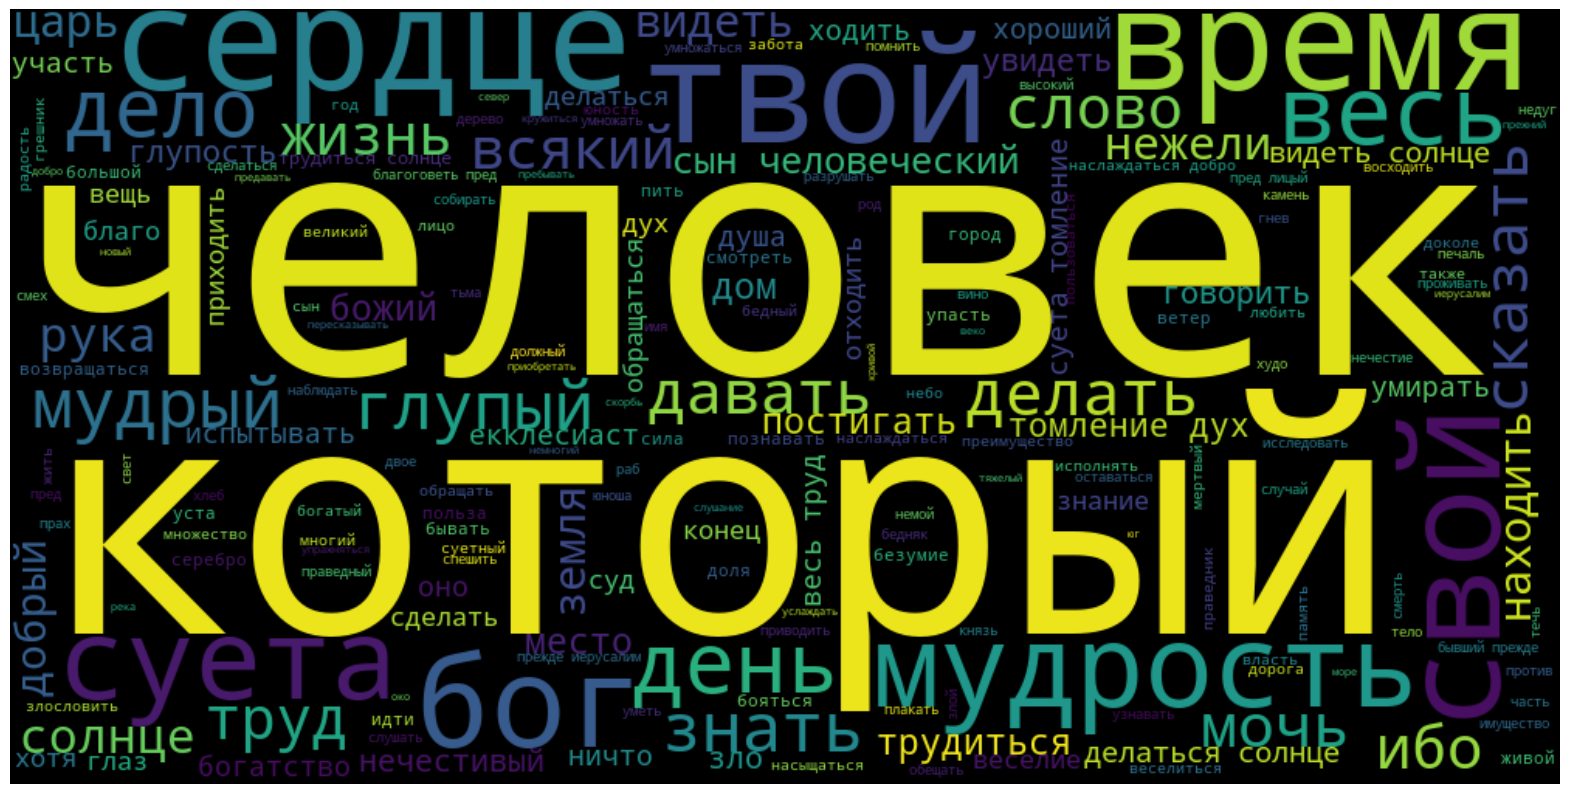

In [15]:
# simple wordcloud
plt.figure(figsize=(20,20))
WC=WordCloud(width=1000,height=500,max_words=200, min_font_size=5)
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path + 'worldcloud_rus_01.jpg')
plt.show

In [16]:
# wordcloud with mask
from PIL import Image
original_image = Image.open(path + 'fortress2.jpg')
#image = original_image.resize([1500,1000])
image = original_image
image = image.convert("L")
threshold = 100
image = image.point(
    lambda x: 255 if x > threshold else 0
)
image.show()

image = np.array(image)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

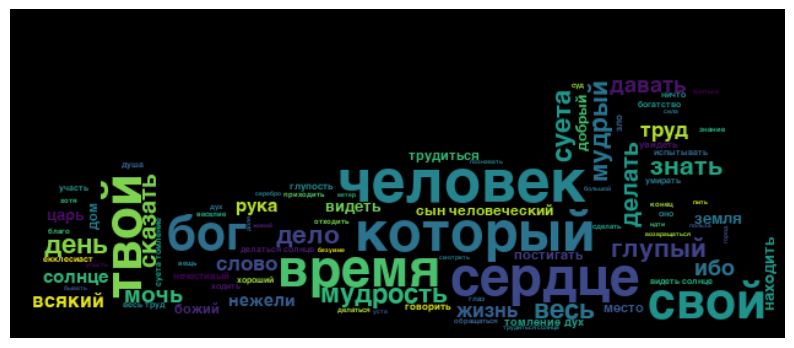

In [17]:
plt.figure(figsize=(10,10))
WC=WordCloud(font_path=path + 'Helvetica-Bold.ttf',
    width=original_image.size[0],height=original_image.size[1],max_words=500, min_font_size=5, mask=image, background_color='black')
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path + 'worldcloud_rus_02_mask.jpg')
plt.show

In [18]:
#  wordcloud with transparanse backgroud combination with other image
 
background_image = Image.open(path + 'fortress2.jpg').convert("RGBA")
#background_image = background_image.resize([1500, 1000])

#mask_image = Image.open(path + 'fortress2.jpg')
#mask_image = mask_image.resize(background_image.size)
mask_image = background_image.convert("L")
threshold = 150
mask_image = mask_image.point(
    lambda x: 255 if x > threshold else 0
)
image = np.array(mask_image)

WC=WordCloud(font_path=path + 'Helvetica.ttf',
    width=background_image.size[0],height=background_image.size[1],max_words=500, min_font_size=5, mask=image, background_color=None, mode='RGBA')#, colormap='gist_yarg_r')#background_color='#D1D1D1')
cloud=WC.generate(text_raw)

wc_image = cloud.to_image()
#wc_image = wc_image.resize(background_image.size)
combined_image = Image.alpha_composite(background_image, wc_image)
combined_image.save(path + 'worldcloud_rus_03_transparense_with_back.png')

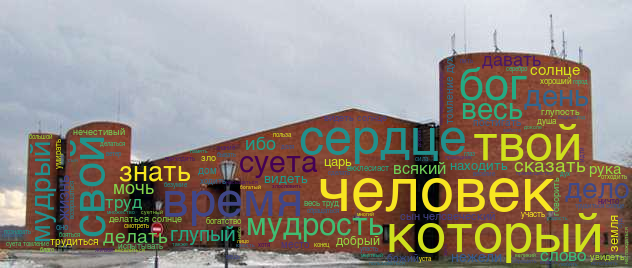

In [19]:
combined_image